In [1]:
##importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

In [2]:
print(load_iris().data.shape)
print(load_iris().target.shape)
print(load_iris().feature_names)
print(load_iris().target_names)

(150, 4)
(150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [3]:
dfx = pd.DataFrame(load_iris().data[:100], columns=(load_iris().feature_names))
dfy = pd.DataFrame(load_iris().target[:100],columns=['target'])
df=pd.concat([dfx, dfy], axis=1)

In [12]:
X=dfx.iloc[:,-1]
X = X[:, np.newaxis]
Y= dfy.iloc[:,0]
Y = Y[:, np.newaxis]
print("Dimensiones en X: {}".format(str(X.shape)))
print("Dimension en Y: {}".format(str(Y.shape)))

Dimensiones en X: (100, 1)
Dimension en Y: (100, 1)


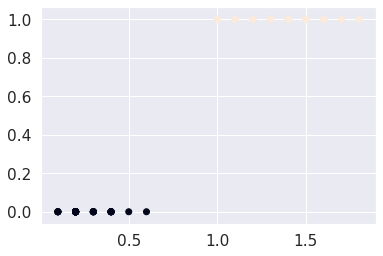

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.3, random_state=4)
plt.scatter(X,Y,c=Y)

In [14]:
clasificador_simple = LogisticRegression()
clasificador_simple.fit(X_train, Y_train)

/home/nicolas/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
Y_pred = clasificador_simple.predict(X_test)

In [16]:
matriz = confusion_matrix(Y_test, Y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[17  0]
 [ 0 13]]


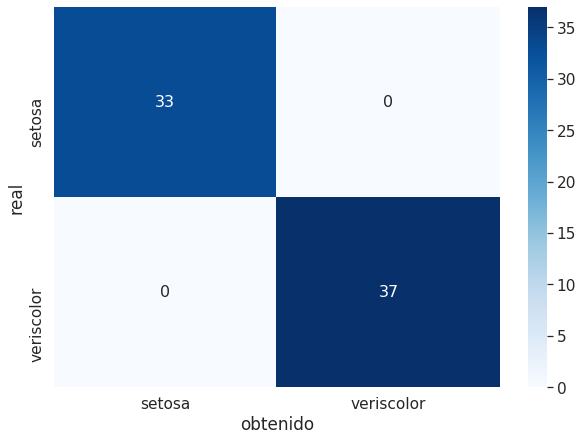

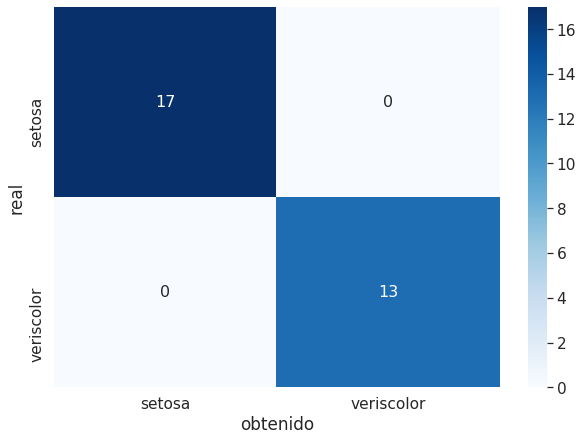

In [17]:
matriz = confusion_matrix(Y_train, clasificador_simple.predict(X_train))
df_cm = pd.DataFrame(matriz, columns=['setosa','veriscolor'], index = ['setosa','veriscolor'])
df_cm.index.name = 'real'
df_cm.columns.name = 'obtenido'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

matriz = confusion_matrix(Y_test, Y_pred)
df_cm = pd.DataFrame(matriz, columns=['setosa','veriscolor'], index = ['setosa','veriscolor'])
df_cm.index.name = 'real'
df_cm.columns.name = 'obtenido'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [19]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

precision = precision_score(Y_test, Y_pred)
#Calculo la exactitud del modelo
exactitud = accuracy_score(Y_test, Y_pred)
#Calculo la sensibilidad del modelo
sensibilidad = recall_score(Y_test, Y_pred)
#Calculo el Puntaje F1 del modelo
puntajef1 = f1_score(Y_test, Y_pred)
#Calculo la curva ROC - AUC del modelo
roc_auc = roc_auc_score(Y_test, Y_pred)

print('Precisión del modelo:', precision)
print('Exactitud del modelo:', exactitud)
print('Sensibilidad del modelo:', sensibilidad)
print('Puntaje F1 del modelo:', puntajef1)
print('Curva ROC - AUC del modelo:', roc_auc)

Precisión del modelo: 1.0
Exactitud del modelo: 1.0
Sensibilidad del modelo: 1.0
Puntaje F1 del modelo: 1.0
Curva ROC - AUC del modelo: 1.0
